# 의사결정나무

- 지도학습의 종류, 분류
- 의사결정을 위한 규칙을 나무 모양으로 조합하여 목표변수(종속변수)에 대한 분류를 수행
- 목표변수가 **이산형** 일 경우 수행
- 시장조사, 광고조사, 품질관리 등 다양한 분야에서 수행
- 과대 적합의 위험이 높기 때문에, 학습모델이 과대적합(또는 과소적합) 되지 않도록 적절히 조절되어야 한다.

**랜덤포레스트**: **부트스트래핑** 기반 샘플링을 활용한 의사결정나무 생성 이후 **배깅** 기반 나무들을 모아 앙상블 학습하여 숲을 형성하게 되면 이를 랜덤포레스트 라고 한다.

In [19]:
# 타이타닉 데이터 적재

import numpy as np
import pandas as pd
import sklearn

# 의사결정나무 분류모델을 위한 패키지 임포트
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


산 사람의 평균 Age와 죽은 사람의 평균 Age를 구해서 결측값을 대체해준다.

In [22]:
mean_age_survived = df.groupby("Survived")['Age'].mean()
mean_age_survived

,Age
Survived,
0,30.626179
1,28.343690


In [23]:
df.loc[df['Survived'] == 0, 'Age'] = df.loc[df['Survived'] == 0, 'Age'].fillna(mean_age_survived[0])
df.loc[df['Survived'] == 1, 'Age'] = df.loc[df['Survived'] == 1, 'Age'].fillna(mean_age_survived[1])


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
d_mode = df["Embarked"].mode()[0]
df["Embarked"].fillna(d_mode,inplace=True)

<ipython-input-25-619e7bcd9d08>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(d_mode,inplace=True)


In [26]:
df=df.drop(columns=['Cabin'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


**레이블 인코딩**

✅ 1. 머신러닝 모델은 숫자만 이해함

✅ 2. 라벨 인코딩은 문자열 → 숫자로 변환

✅ 3. Label Encoding은 순서가 없는 데이터에도 숫자를 부여하기 때문에 주의

-> **One-Hot Encoding**

범주형 데이터를 이진 벡터로 변환하는 방법



In [28]:
# Sex 칼럼의 1,0으로 레이블 인코딩한다.
from sklearn.preprocessing import LabelEncoder
df["Sex"]=LabelEncoder().fit_transform(df['Sex'])

# Embarked 킬럼의 값을 레이블 인코딩한다.
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])

# SibSp,Parch의 값을 더해서 Family 칼럼을 만든다.
df['Family']= df["SibSp"] + df["Parch"]

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.626179,1,2,W./C. 6607,23.4500,2,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0,0


In [30]:
# 분석 데이터셋 준비
# X는 독립변수, y는 종속변수

X = df[["Pclass",'Sex','Age','Fare','Embarked','Family']]
y = df['Survived']

# 데이터 분할
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
# 분석수행

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
pred = dt.predict(X_test)

In [34]:
# 모델의 성능 - 정확도 측정
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pred)
print(acc)

0.770949720670391


**오차행렬**
정답: 87+51 = 138
오답: 17+24 = 41

In [35]:
# 오차행렬을 통한 성능평가
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,pred)
print(mat)

[[87 17]
 [24 51]]


#의사결정나무 총 정리

> 데이터를 조건에 따라 나누면서 분류하거나 예측하는 트리 구조의 모델.

 마치 스무고개처럼,

"이 사람은 남자인가?"

"나이는 10살 이상인가?"

"운임요금은 100 이상인가?"
처럼 조건을 기준으로 데이터를 쪼개서, 최종적으로 분류나 예측을 합니다.
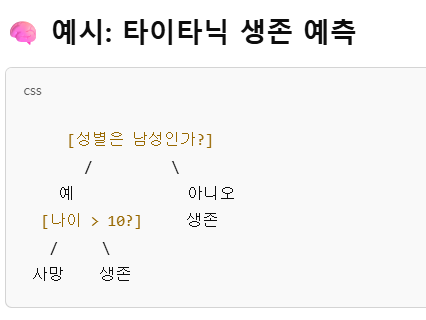![image.png]()

작동원리
- 가장 잘 데이터를 나눌 수 있는 기준을 찾음.
- 위 과정을 반복하여 더 이상 나눌 수 없거나 최대 깊이에 도달하면 멈춤

어떤 기준?
- 지니지수
- 엔트로피지수


/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 51453 (\N{HANGUL SYLLABLE JUG}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51453 (\N{HANGUL SYLLABLE JUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/

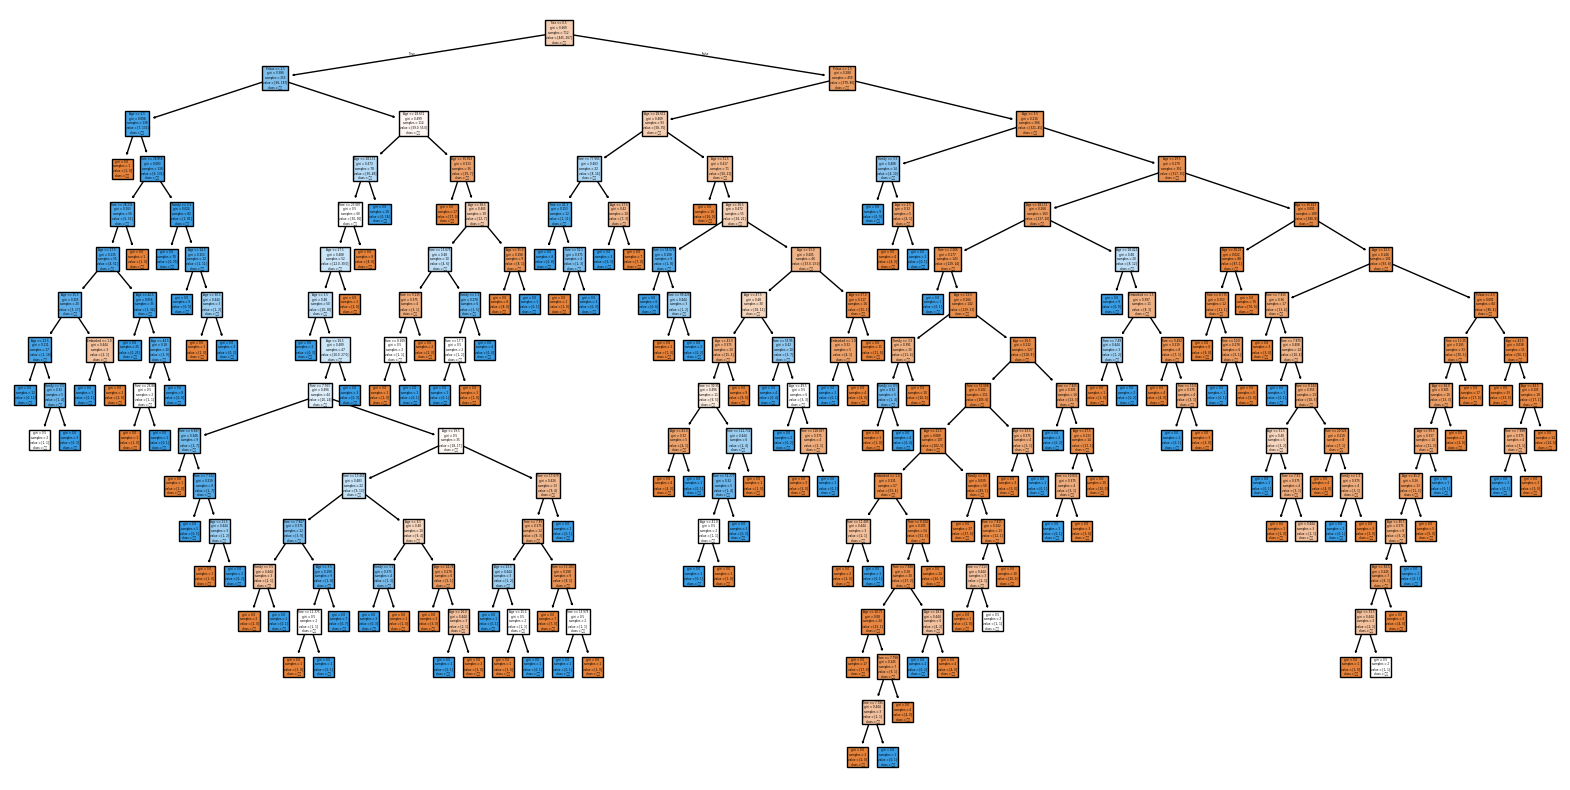

In [36]:
# 트리시각화
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['죽음', '생존'], filled=True)
plt.show()

In [37]:
from sklearn.tree import export_text

tree_text = export_text(dt, feature_names=list(X.columns))
print(tree_text)

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- Fare <= 28.86
|   |   |   |   |--- Fare <= 28.23
|   |   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |   |--- Age <= 25.50
|   |   |   |   |   |   |   |--- Age <= 23.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Age >  23.50
|   |   |   |   |   |   |   |   |--- Family <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Family >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  25.50
|   |   |   |   |   |   |   |--- Embarked <= 1.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Embarked >  1.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age >  27.50
|   |   |   |   |   |   |--- Age <= 42.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  42.